## **Árvore de Decisão - Introdução**

* O algoritmo analisa os dados originais:

<div>
    <img src="imagens/original.png">
</div>

* E constrói uma árvore de decisão:
- Os retângulos são as classes
- Os circulos são os atributos previsores
- Para analisar um novo registro, basta `percorrer` a árvore

<div>
    <img src="imagens/arvore_decisao.png">
</div>

* Os atributos que estão no `topo` da árvore de decisão são considerados os mais `importantes`

## **Árvore de Decisão - Aprendizagem**

* Existem dois cálculos que precisam ser feitos:
- Entropia (S)
- Ganho de informação (S, A)
- Estes cálculos são responsáveis por descobrir quais são os `melhores atributos` da base de dados para serem colocamos nos `ramos superiores` da árvore de decisão

<div>
    <img src="imagens/calculos.png">
</div>

* Cálculo da Entropia: mede o quão organizados estão os dados

<div>
    <img src="imagens/entropia.png">
</div>

* Cálculo do Ganho de informação: mede a importância dos atributos
- Este cálculo é feito para todos os atributos, na imagem abaixo tem-se um exemplo do atributo 'história'
- O atributo que tiver o maior valor de Ganho de informação (G) será o atributo mais importante, e por este motivo, será colocado no ramo superior da árvore
- G(renda) = 0,66 `>` G(história) = 0,26 `>` G(garantias) = 0,20 `>` G(dívida) = 0,06
- Atributo Renda mais importante!
- As vezes o atributo tem um ganho de informação tão pequeno que acaba nem entrando na árvore de decisão

<div>
    <img src="imagens/ganho.png">
</div>

* Depois de efetuar os cálculos, a árvore será montada

<div>
    <img src="imagens/arv1.png">
</div>



## **Árvores de Decisão - Mais Conceitos**

* Outra maneira de se trabalhar com árvores de decisão é realizar `divisões` (splits)

<div>
    <img src="imagens/split.png">
</div>

* Conceitos de `poda` em árvores de decisão
- Você gera uma árvore de decisão e pode fazer uma `poda` nos atributos que tem pouco ganho de informação. Ou seja, são removidos os atributos 'desnecessários'
- `Bias (viés)`: São erros por classificação errada
- `Variância`: Erros por sensibilidade pequena a mudanças na base de treinamento. Pode levar a overfitting (overfitting é quando o algoritmo se adapta demais aos dados de treinamento(decora os dados de treinamento), e quando vai analisa a base de teste gera muito erros)
- Quando a poda é necessária e bem feita, o algoritmo tende a dar resultados melhores

## **Árvores de Decisão - Vantagens e Desvantagens**

* `Vantagens`

<ul>
    <li>Fácil interpretação</li>
    <li>Não precisar normalizar ou padronizar os dados</li>
    <li>Rápido para classificar novos registros</li>
</ul>

* `Desvantagens`

<ul>
    <li>Pode gerar árvores muito complexas, e com isso gerar um overfitting, onde a árvore se adapta demais aos dados de treinamento (decora os dados)</li>
    <li>Pequenas mudanças nos dados pode mudar a árvore (neste caso, fazer poda pode ajuda)</li>
    <li>É um problema NP-completo para construir a árvore</li>
</ul>

* `Curiosidades`

- Essas árvores de decisão eram muito populares na década de 90. Hoje em dia existem algoritmos mais sofisticados que possuem desempenho superior
- O `random forest` melhora o desempenho do algoritmo

## **Árvore de Decisão - RANDOM FOREST**

* Teremos `mais` de uma árvore de decisão. 
* É feita uma combinação dos resultados de cada árvore.
* Várias árvores são consultadas para então tomar uma decisão
* "Vários algoritmos juntos para construir um algoritmo mais forte"
* Para dar a resposta final, o algoritmo utiliza a média (em caso de `regressão`) ou votos da maioria (em caso de `classificação`) 
* Cuidar com a quantidade de árvores. Caso sejam utilizadas muitas árvores pode gerar problema de overfitting.

`Funcionamento do Random Forest`

* Escolhe de forma aleatória `K` atributos para comparação da métrica de pureza/impureza
* Ou seja, se passarmos como parâmetro (K = 3 e Arvores = 3) → o algoritmo vai escolher de forma aleatória 3 atributos e gerar 3 árvores. Dessa forma, cada árvore vai pegar atributos diferentes

<div>
    <img src="imagens/random_forest.png">
</div>

## **Árvore de Decisão - Implementação**

In [1]:
from sklearn.tree import DecisionTreeClassifier

## **Base Risco de Crédito**

In [2]:
import pickle

In [3]:
with open('base_dados/risco_credito.pkl', 'rb') as f:
    X_risco_credito, y_risco_credito = pickle.load(f)

In [4]:
# Atributos previsores
X_risco_credito
# História_de_credito | Dívida | Garantia | Renda

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [5]:
# Atributos classe
y_risco_credito
# Risco de conceder crédito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [10]:
arvore_risco_credito = DecisionTreeClassifier(criterion='entropy')
# Treinamento do algoritmo
arvore_risco_credito.fit(X_risco_credito, y_risco_credito)

DecisionTreeClassifier(criterion='entropy')

In [11]:
arvore_risco_credito.feature_importances_
# features importances retorna a IMPORTÂNCIA de cada critério, ou seja, indica qual dos atributos apresenta o maior GANHO DE INFORMAÇÃO
# Neste caso, Renda > Histórico > Dívida > Garantia 

array([0.41607015, 0.10294068, 0.03885431, 0.44213486])

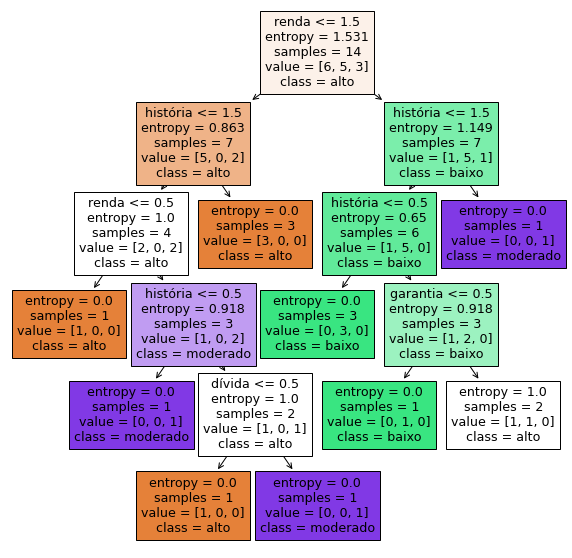

In [16]:
# Conseguimos visualizar a árvore de decisão:
from sklearn import tree
import matplotlib.pyplot as plt
# nome dos previsores
previsores = ['história', 'dívida', 'garantia', 'renda']
# Aumentando o tamanho da imagem
figure, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(arvore_risco_credito, feature_names=previsores, class_names=arvore_risco_credito.classes_, filled=True);

In [17]:
# Realizando a previsão de 2 registros:
# história boa(0), dívida alta(0), garantia nenhuma (1), renda > 35 (2)
# história ruim(2), dívida alta(0), garantia adequada(0), renda < 15(0)

# Como temos labelencoder, precisamos passar os valores numéricos
previsoes = arvore_risco_credito.predict([[0,0,1,2], [2,0,0,0]])

In [18]:
previsoes

array(['baixo', 'alto'], dtype=object)

## **Base Credit Data**

In [19]:
with open('base_dados/credit.pkl', 'rb') as f:
    X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [20]:
X_credit_treinamento.shape , y_credit_treinamento.shape

((1500, 3), (1500,))

In [21]:
X_credit_teste.shape , y_credit_teste.shape

((500, 3), (500,))

In [22]:
# Gerando árvore de decisão
# random_state serve para toda vez q executarmos esse algoritmo, gerar os mesmos resultado
arvore_credit = DecisionTreeClassifier(criterion='entropy', random_state=0)

arvore_credit.fit(X_credit_treinamento, y_credit_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [23]:
previsoes_credit = arvore_credit.predict(X_credit_teste)
# Previsão do algoritmo
previsoes_credit

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [24]:
# Dados reais
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [25]:
from sklearn.metrics import accuracy_score, classification_report

In [26]:
accuracy_score(y_credit_teste, previsoes_credit)
# Acurácia de 98,2%

0.982

0.982

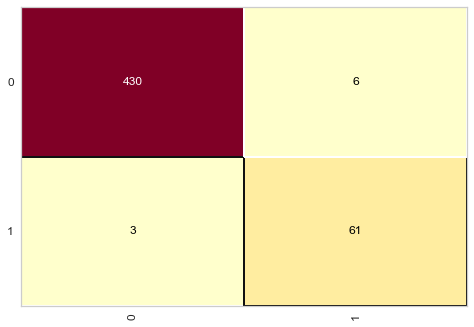

In [28]:
# Gerando matriz de confusão
from yellowbrick.classifier import ConfusionMatrix
cm_credit = ConfusionMatrix(arvore_credit)
cm_credit.fit(X_credit_treinamento, y_credit_treinamento)
cm_credit.score(X_credit_teste, y_credit_teste)

In [29]:
# Relatório
print(classification_report(y_credit_teste, previsoes_credit))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



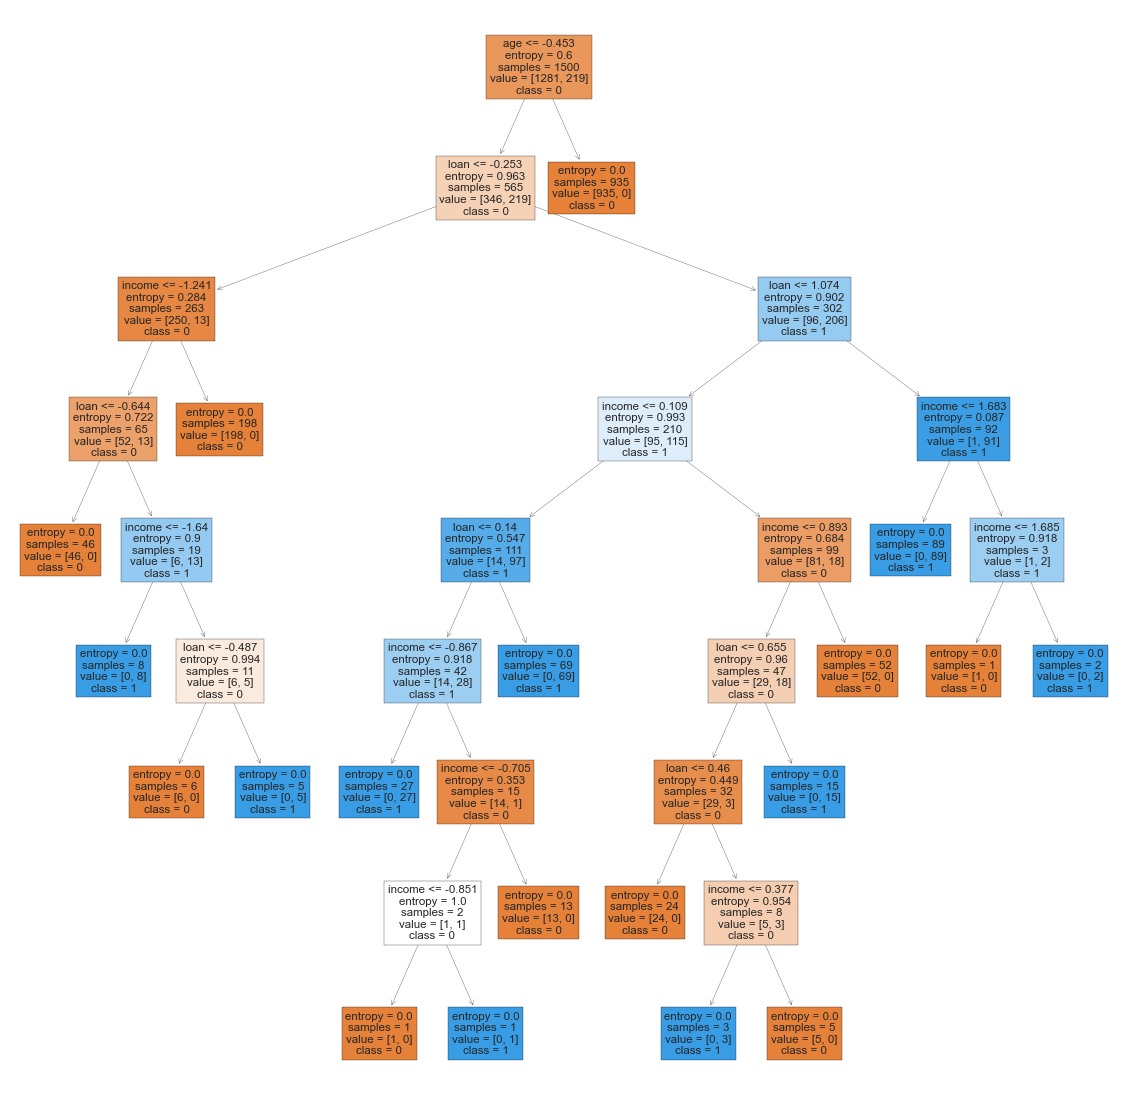

In [33]:
# Conseguimos visualizar a árvore de decisão:
from sklearn import tree
import matplotlib.pyplot as plt
# nome dos previsores
previsores_credit = ['income', 'age', 'loan']
# Aumentando o tamanho da imagem
figure, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,20))
tree.plot_tree(arvore_credit, feature_names=previsores_credit, class_names=['0','1'], filled=True);

## **Base Census**

In [34]:
with open('base_dados/census.pkl', 'rb') as f:
    X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [35]:
X_census_treinamento.shape , y_census_treinamento.shape

((27676, 108), (27676,))

In [36]:
X_census_teste.shape , y_census_teste.shape

((4885, 108), (4885,))

In [37]:
arvore_census = DecisionTreeClassifier(criterion='entropy', random_state=0)

arvore_census.fit(X_census_treinamento, y_census_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [39]:
previsoes_census = arvore_census.predict(X_census_teste)

In [40]:
previsoes_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [41]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [42]:
accuracy_score(y_census_teste, previsoes_census)
# 81% de acurácia

0.8104401228249745

0.8104401228249745

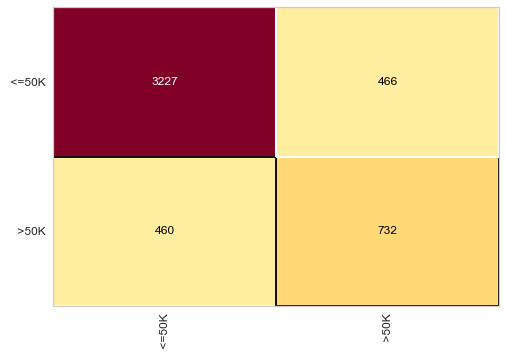

In [43]:
# Gerando matriz de confusão
from yellowbrick.classifier import ConfusionMatrix
cm_census = ConfusionMatrix(arvore_census)
cm_census.fit(X_census_treinamento, y_census_treinamento)
cm_census.score(X_census_teste, y_census_teste)

In [44]:
print(classification_report(y_census_teste, previsoes_census))

              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87      3693
        >50K       0.61      0.61      0.61      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.74      0.74      4885
weighted avg       0.81      0.81      0.81      4885



## **Random Forest - Implementação**

In [45]:
from sklearn.ensemble import RandomForestClassifier

## **Random Forest - Base Credit Data**

In [46]:
with open('base_dados/credit.pkl', 'rb') as f:
    X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [48]:
X_credit_treinamento.shape , y_credit_treinamento.shape

((1500, 3), (1500,))

In [49]:
X_credit_teste.shape , y_credit_teste.shape

((500, 3), (500,))

In [56]:
# Random forest
# Vamos utilizar 40 árvores para testar
# O ideal é fazer teste com os parâmetros
# Nem sempre quanto maior o número de árvore melhor 
random_forest_credit = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state=0)
random_forest_credit.fit(X_credit_treinamento, y_credit_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [57]:
previsoes_random_credit = random_forest_credit.predict(X_credit_teste)
previsoes_random_credit
# Previsões do algoritmo

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [58]:
# Respostas reais
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [59]:
accuracy_score(y_credit_teste, previsoes_random_credit)

0.984

0.984

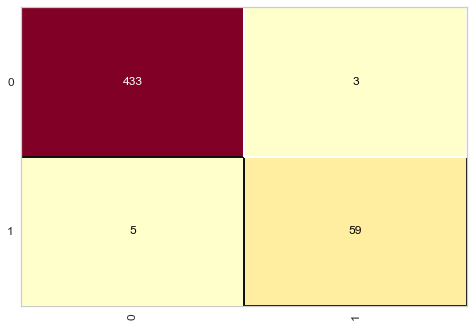

In [60]:
# Gerando matriz de confusão
from yellowbrick.classifier import ConfusionMatrix
cm_random_credit = ConfusionMatrix(random_forest_credit)
cm_random_credit.fit(X_credit_treinamento, y_credit_treinamento)
cm_random_credit.score(X_credit_teste, y_credit_teste)

In [61]:
print(classification_report(y_credit_teste, previsoes_random_credit))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.95      0.92      0.94        64

    accuracy                           0.98       500
   macro avg       0.97      0.96      0.96       500
weighted avg       0.98      0.98      0.98       500



## **Random Forest - Base Census**

In [62]:
with open('base_dados/census.pkl', 'rb') as f:
    X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [63]:
X_census_treinamento.shape , y_census_treinamento.shape

((27676, 108), (27676,))

In [64]:
X_census_teste.shape , y_census_teste.shape

((4885, 108), (4885,))

In [71]:
# Utilizando 100 árvores
random_forest_census = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)

random_forest_census.fit(X_census_treinamento, y_census_treinamento)

RandomForestClassifier(criterion='entropy', random_state=0)

In [72]:
previsoes_random_census = random_forest_census.predict(X_census_teste)
previsoes_random_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [69]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [73]:
accuracy_score(y_census_teste, previsoes_random_census)

0.8507676560900717

0.8507676560900717

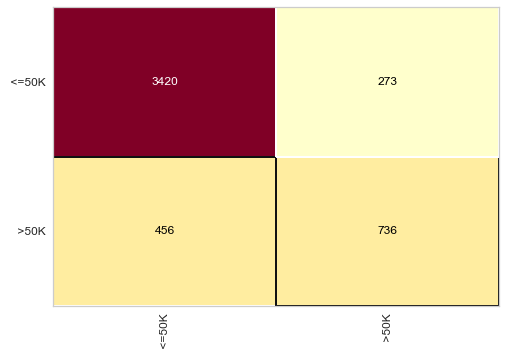

In [74]:
# Gerando matriz de confusão
from yellowbrick.classifier import ConfusionMatrix
cm_random_census = ConfusionMatrix(random_forest_census)
cm_random_census.fit(X_census_treinamento, y_census_treinamento)
cm_random_census.score(X_census_teste, y_census_teste)

In [75]:
print(classification_report(y_census_teste, previsoes_random_census))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.62      0.67      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.77      0.79      4885
weighted avg       0.85      0.85      0.85      4885

